In [22]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Lets now first get the location of the csv file and read the dataframe.

In [19]:
file_location=os.path.join(os.path.dirname(os.path.abspath("__file__")),r"haberman.csv")
df=pd.read_csv(file_location)

# Data observation

Now lets get how many data points and features. You can also get that with shape of the dataset

In [20]:
df.shape

(306, 4)

df.info() prints out the information about the columns in the dataframe. Its prints in <colimn_name, count (if any values are null), and dtype of the column>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     306 non-null    int64
 1   Year    306 non-null    int64
 2   Nodes   306 non-null    int64
 3   Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
df.head()

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Print out all the columns of the dataset

In [5]:
columns=df.columns
columns

Index(['Age', 'Year', 'Nodes', 'Status'], dtype='object')

Checking if there are any null or nan values

In [8]:
df.isnull().sum()

Age       0
Year      0
Nodes     0
Status    0
dtype: int64

Check for the count of nodes are in df

In [21]:
df["Nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Nodes, dtype: int64

# Now lets do some Ploting

Lets do the pair-ploting. This gives us pairwise relation of each column with other

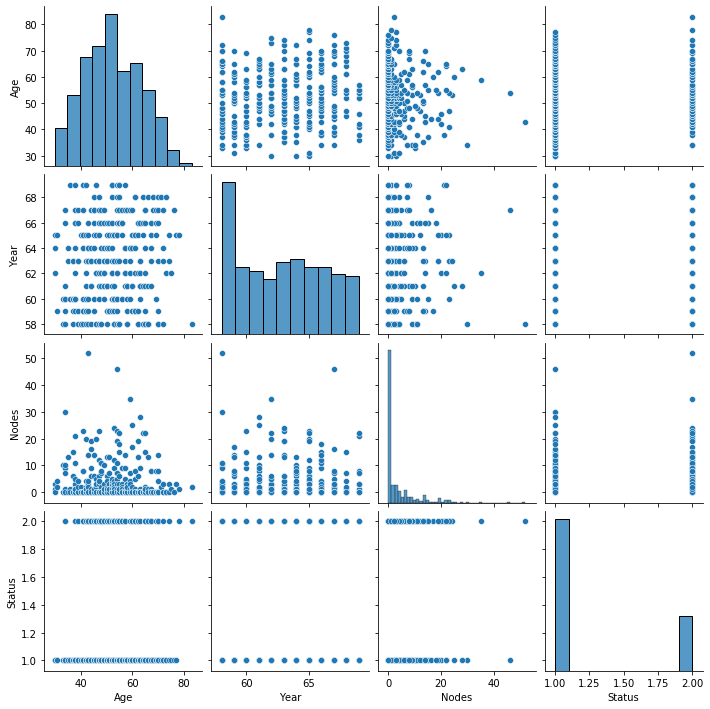

In [9]:
sns.pairplot(df)

Lets plot probability distribution now. This gives us the probability density function of each feature

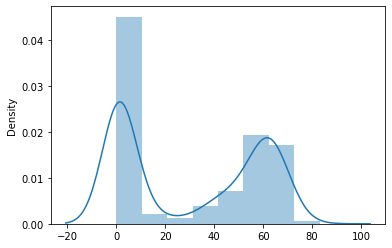

In [13]:
sns.distplot(df)

Lets plot cumulative distribution. A cumulative distribution represents the proportion or count of observations falling below each unique value in a dataset.

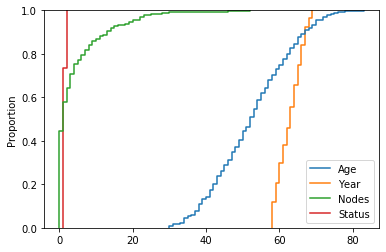

In [15]:
sns.ecdfplot(df)

Getting the scatter plot for age vs how may nodes

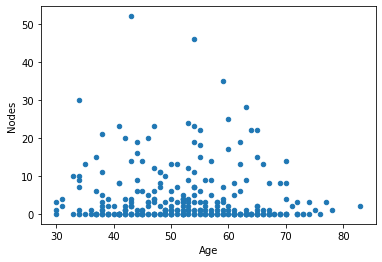

In [23]:
df.plot(kind='scatter', x='Age', y='Nodes') ;
plt.show()

Boxplots show distributions with respect to categories. It mentions the outliers in the dataset. We have to be careful with the outliers. It might a datapoint also, just it is in our case.

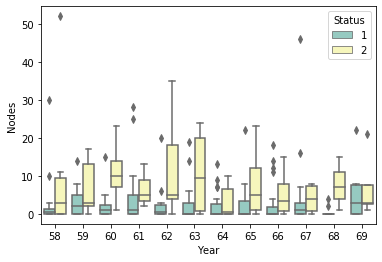

In [28]:
sns.boxplot(x="Year", y="Nodes", hue="Status", data=df, palette="Set3")

Violin Plot used are the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.

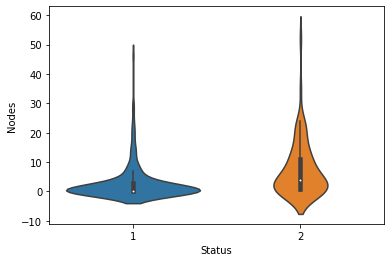

In [33]:
sns.violinplot(x="Status", y="Nodes", data=df, size=8)

# Predictive Modeling

In [29]:
#get numpy array
data=df.values
#split data into input features 'X' and output 'Y'
X, Y = data[:, :-1], data[:, -1]

In [36]:
#split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (214, 3)
y_train: (214,)
X_test: (92, 3)
y_test: (92,)


Lets do the data modeling.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lm_model = LinearRegression(normalize=True) 

lm_model.fit(X_train, y_train) 

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [35]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.08551538305423201.  The rsquared on the test data was 0.07384488462123207.


You can see that both the values are pretty less. This is because of underfitting. With the increase in data, these r2_score will also increase.